# Tensegrity structures

### Loading libraries and files

In [1]:
#importing libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
import importlib
from PIL import Image
import imageio
import io

#importing .py files and reloading
import CableTensegrityStruct as CTS
importlib.reload(CTS)
import TensegrityStruct as TS
importlib.reload(TS)
import optimization as opt
importlib.reload(opt)
import plotting
importlib.reload(plotting)
import FreeStandingStruct as FSS
importlib.reload(FSS)

<module 'FreeStandingStruct' from 'C:\\Users\\eirik\\OneDrive\\Documents\\GitHub\\Project---Optimization\\FreeStandingStruct.py'>

### Test example with only cables, fixed nodes

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.55111512e-17 -5.55111512e-17 -2.77555756e-17  5.55111512e-17
 -5.55111512e-17 -2.77555756e-17  5.55111512e-17  5.55111512e-17
 -2.77555756e-17 -5.55111512e-17  5.55111512e-17 -2.77555756e-17]


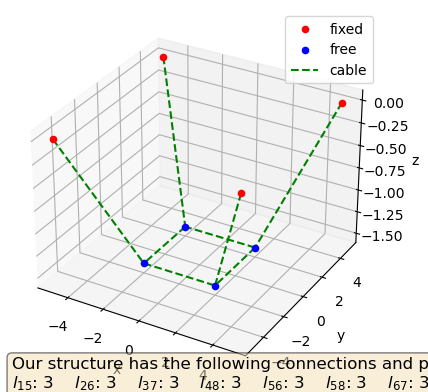

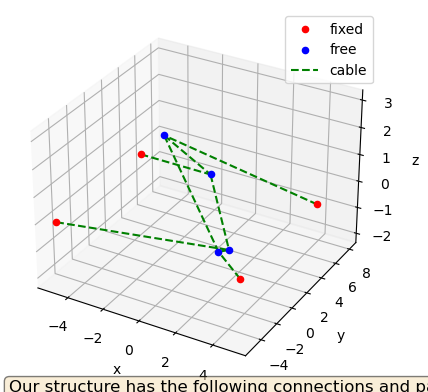

iter:  37


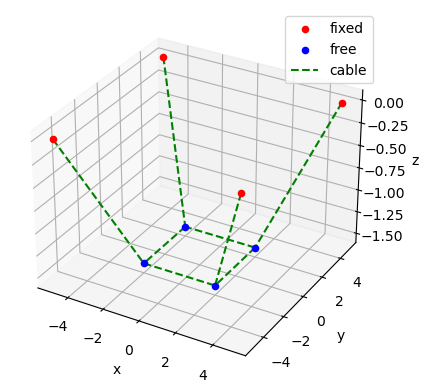

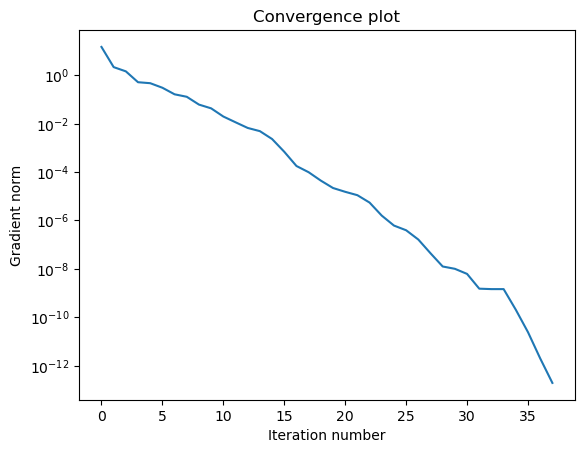

"\nimages = []\nfor fig_i in imgs:\n    # convert the Matplotlib figure to an image\n    buf = io.BytesIO()\n    fig_i.savefig(buf, format='png')\n    buf.seek(0)\n    img = Image.open(buf)\n    images.append(img)\n\n# save the sequence of images as a GIF\nimageio.mimsave('figure1.gif', images, duration=2)\n"

In [11]:
num_of_nodes = 8
num_of_fixed_nodes = 4

nodes = np.array([[ 5,  5,    0],
                  [-5,  5,    0],
                  [-5, -5,    0],
                  [ 5, -5,    0],
                  [ 2,  2, -1.5],
                  [-2,  2, -1.5],
                  [-2, -2, -1.5],
                  [ 2, -2, -1.5]])

cables = np.array([[0, 4, 3],
                   [1, 5, 3],
                   [2, 6, 3],
                   [3, 7, 3],
                   [4, 5, 3],
                   [4, 7, 3],
                   [5, 6, 3],
                   [6, 7, 3]])

masses = np.array([[4, 1/6],
                   [5, 1/6],
                   [6, 1/6],
                   [7, 1/6]])

k = 3

struct1 = CTS.CableTensegrityStruct(num_of_nodes, num_of_fixed_nodes,nodes, masses,cables, k)

struct2 = copy.deepcopy(struct1)

#Burde være 000000000000
print(struct2.gradient())
fig, ax = plotting.textbox(struct2)
plt.show()

#Test with random initialization
new_X = np.array([5, 5, 0,-5, 5, 0, -5, -5, 0, 5, -5, 0, -5, 8, 0, 3, -4, 3, 1, 3, -2, 3, -3, 0])

struct1.update_nodes(new_X)
plotting.textbox(struct1)
plt.show()

result = opt.BFGS(struct1, return_norms=True)
struct1_opt = result[0]
norms = result[1]
plotting.plot(struct1_opt)
plt.show()

plotting.convergence_plot(norms)
plt.show()

# create a list of Matplotlib figures

# create a sequence of images
"""
images = []
for fig_i in imgs:
    # convert the Matplotlib figure to an image
    buf = io.BytesIO()
    fig_i.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)

# save the sequence of images as a GIF
imageio.mimsave('figure1.gif', images, duration=2)
"""

### Test example with cables and bars, fixed nodes

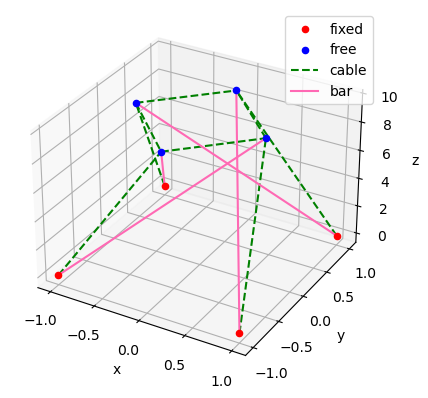

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.06271080e-06  3.13847095e-09 -2.99500203e-08 -3.13847095e-09
  2.06271080e-06 -2.99500203e-08 -2.06271080e-06 -3.13847095e-09
 -2.99500203e-08  3.13847095e-09 -2.06271080e-06 -2.99500203e-08]
iter:  7


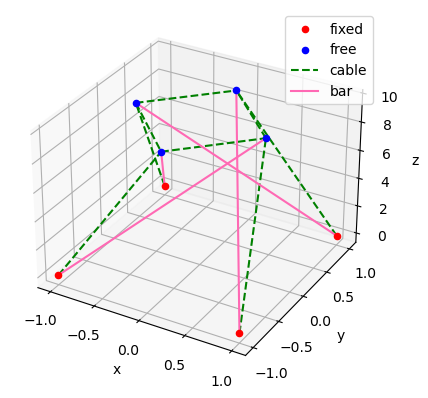

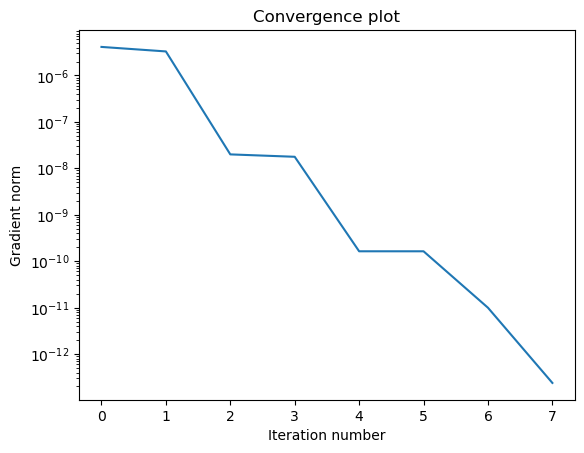

In [12]:
num_of_nodes = 8
num_of_fixed_nodes = 4

s = 0.70970
t = 9.54287

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s,  0, t],
                  [ 0, -s, t],
                  [ s,  0, t],
                  [ 0,  s, t]])

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([[4, 0],
                   [5, 0],
                   [6, 0],
                   [7, 0]])

c=1
k=0.1
bar_density = 0

tensstruct = TS.TensegrityStruct(num_of_nodes, num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)
fig, ax = plotting.plot(tensstruct)
plt.show()
print(tensstruct.gradient())

result = opt.BFGS(tensstruct, maxiter=100, return_norms=True)
tensstruct_opt = result[0]
norms = result[1]
plotting.plot(tensstruct_opt)
plt.show()

plotting.convergence_plot(norms)
plt.show()

iter:  83
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.53895072e-13 -1.14609819e-13 -4.71341716e-14 -2.41668014e-13
  5.35625689e-14 -1.05644660e-14  2.35902227e-13 -2.98443995e-14
  8.25047496e-14 -1.40108032e-13  9.16436523e-14 -4.92301512e-14]


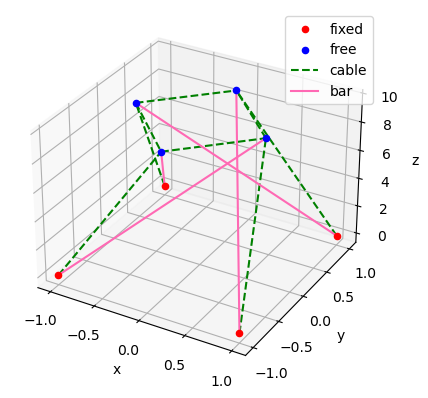

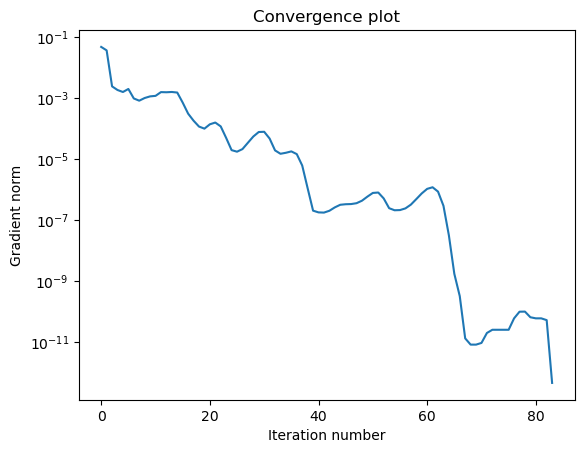

In [13]:
s = 0.70970
t = 9.54287

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1, -s-0.1, t-0.1],
                  [ s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1,  s-0.1, t-0.1]])
num_of_nodes = 8
num_of_fixed_nodes = 4
cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([[4, 0],
                   [5, 0],
                   [6, 0],
                   [7, 0]])

c=1
k=0.1
bar_density = 0

tensstruct = TS.TensegrityStruct(num_of_nodes, num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)

result = opt.BFGS(tensstruct, maxiter=1000, return_norms=True)
tensstruct_opt = result[0]
norms = result[1]
print(tensstruct_opt.gradient())
plotting.plot(tensstruct_opt)
plt.show()

plotting.convergence_plot(norms)
plt.show()

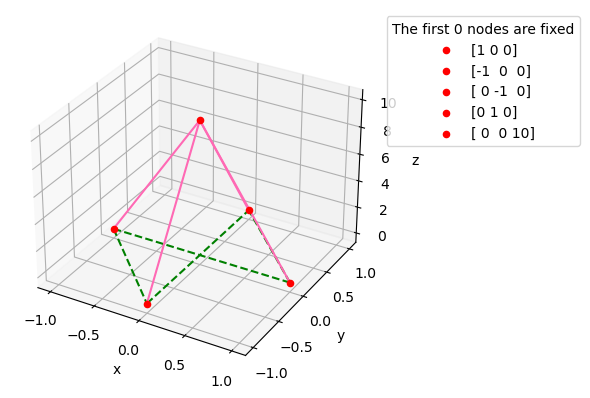

[ 0.20723253 -0.02928932  0.72056795 -0.20723253  0.02928932  0.72056795
  0.02928932 -0.20723253  0.72056795 -0.02928932  0.20723253  0.72056795
  0.          0.          9.21772819]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 15)

In [25]:
nodes = np.array([[ 1,  0, 0],
                  [-1,  0, 0],
                  [0, -1, 0],
                  [0 , 1, 0],
                  [0,  0, 10],
                  ])
num_of_nodes = 5
cables = np.array([[0, 1, 1],
                   [0, 3, 1],
                   [1, 2, 1],
                   [2, 3, 1]])

bars = np.array([[0, 4, 3],
                   [1, 4, 3],
                   [2, 4, 3],
                   [3, 4, 3]])

masses = np.array([[0,0],
                   [1,0],
                   [2,0],
                   [3,0],
                   [4,0.1]])

c=1
k=0.1
bar_density = 1

new_struct = FSS.FreeStandingStruct(num_of_nodes, nodes, masses, cables, bars, k, c, bar_density, 1)
plotting.plot(new_struct)
plt.show()
tolerances=np.array([1e-3, 1e-5, 1e-7, 1e-9, 1e-11])
new_struct = opt.quadratic_penalty_method(new_struct, 10, tolerances, maxiter_BFGS=500)

plotting.plot(new_struct)
plt.show()

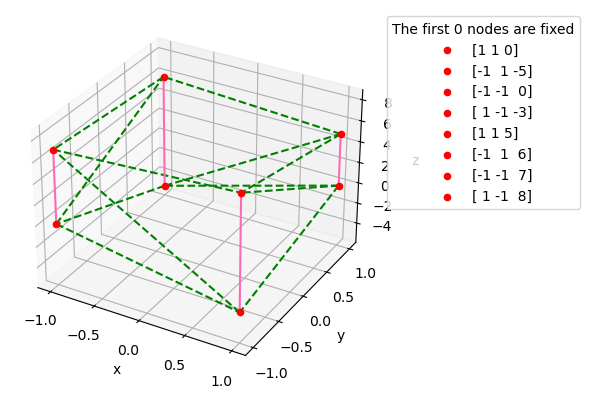

100
[ 0.16286093  0.14462329  0.72357408 -0.16353448  0.16286093 -0.7776724
 -0.14452998 -0.16286093  0.7039473   0.14520353 -0.14452998 -0.39695768
  0.11123083  0.14452998 -0.26870587 -0.11055728  0.11055728  0.06
 -0.11123083 -0.11055728  0.02336774  0.11055728 -0.14462329  0.33244683]
[ 7.23574083e-01 -1.63534481e-01  1.62860932e-01 -5.00777672e+02
 -1.44529980e-01 -1.62860932e-01  7.03947301e-01  1.45203529e-01
 -1.44529980e-01 -3.00396958e+02  1.11230829e-01  1.44529980e-01
 -2.68705869e-01 -1.10557281e-01  1.10557281e-01  6.00000000e-02
 -1.11230829e-01 -1.10557281e-01  2.33677416e-02  1.10557281e-01
 -1.44623285e-01  3.32446830e-01]
The penalty is 10
[ 0.16286093  0.14462329  0.72357408 -0.16353448  0.16286093 -0.7776724
 -0.14452998 -0.16286093  0.7039473   0.14520353 -0.14452998 -0.39695768
  0.11123083  0.14452998 -0.26870587 -0.11055728  0.11055728  0.06
 -0.11123083 -0.11055728  0.02336774  0.11055728 -0.14462329  0.33244683]
[ 0.18483523  0.18483523 -6.90396119 -0.0977788

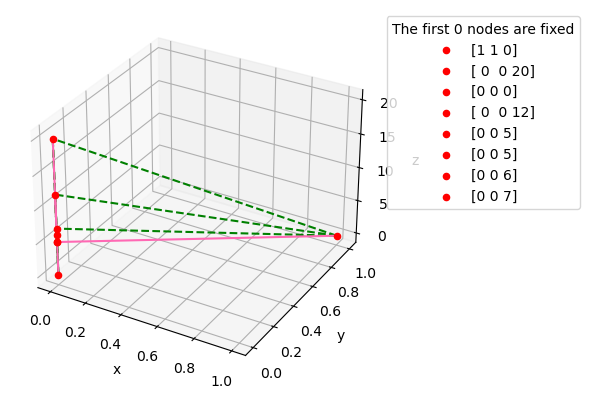

[ 0.17619981  0.17619981 -2.60489852 -0.09446151 -0.09446151  3.48811972
  0.          0.         -2.61       -0.0909833  -0.0909833   1.99081634
  0.00924501  0.00924501 -0.10403754  0.          0.          0.02
  0.          0.          0.01        0.          0.          0.21      ]
s: [ 1.24783071e+00  4.06629567e-02  4.09302506e-02 -1.72098626e+00
 -1.18359415e-04 -1.33371115e-04  1.25008552e+00  3.95037541e-02
  3.92664837e-02 -9.69833992e-01 -3.87857415e-03 -3.85130460e-03
  4.57938907e-02 -9.05382747e-05  9.05382747e-05  4.91355833e-05
 -9.10898612e-05 -9.05382747e-05 -4.27470903e-03  9.05382747e-05
 -1.18435824e-04 -8.56046604e-02]
y: [ 0.2998128   0.00055094  0.00055094 -0.42306685  0.          0.
  0.3         0.00074064  0.00074064 -0.20987095  0.          0.
  0.003125    0.          0.          0.02        0.          0.
  0.          0.          0.          0.01      ]


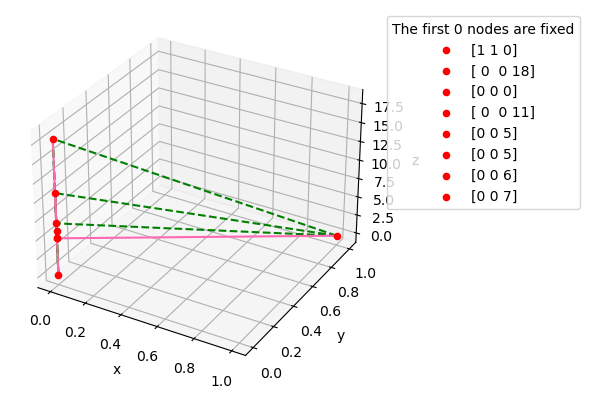

[ 0.08137438  0.08273471  1.51405099 -0.08759653  0.05287517 -1.28210171
 -0.08895685 -0.08759653  1.50138384  0.07470328 -0.08895685 -1.494209
  0.00622214  0.00622214  0.08733285  0.          0.03472136 -0.01944272
  0.          0.          0.1         0.01425356  0.         -0.00701425]
s: [ 1.07756858e+01  3.92336239e-01  3.94624736e-01 -1.47724529e+01
 -1.01336127e-03 -1.14188738e-03  1.07967542e+01  3.79953170e-01
  3.77921725e-01 -8.45008743e+00 -3.77457241e-02 -3.75122496e-02
  4.30778688e-01 -7.75164197e-04  7.75164197e-04 -8.85575470e-02
 -7.79886731e-04 -7.75164197e-04 -4.15079527e-02  7.75164197e-04
 -1.01401546e-03 -8.75594068e-01]
y: [ 4.11894950e+00  6.86498570e-03  1.47336679e-01 -4.77022143e+00
 -8.89568474e-02 -8.75965265e-02  4.11138384e+00  1.65686589e-01
  2.02645626e-03 -3.48502534e+00 -3.02286686e-03 -3.02286686e-03
  1.91370398e-01  0.00000000e+00  3.47213595e-02 -3.94427191e-02
  0.00000000e+00  0.00000000e+00  9.00000000e-02  1.42535625e-02
  0.00000000e+00 -2

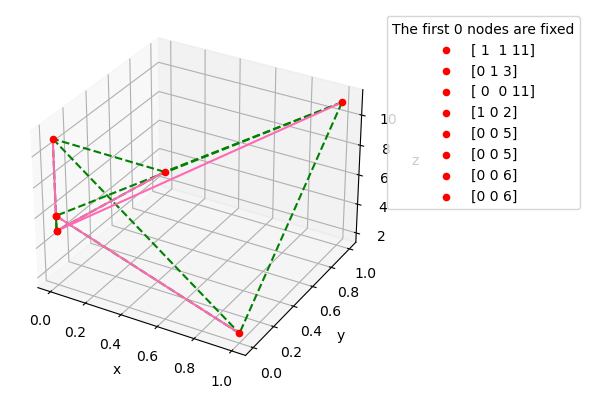

[-0.00153551  0.02445381  0.0696183  -0.02928932  0.00766655  0.04371031
 -0.05527864 -0.02928932  0.04126796  0.02055728 -0.05527864 -0.10167184
  0.03082483  0.03082483  0.01164966  0.          0.02162278  0.11486833
  0.          0.          0.14        0.03472136  0.          0.08055728]
s: [-3.69964607e+00 -9.11484526e-02 -1.34806495e-01  4.83505933e+00
  2.75091365e-02  2.71341647e-02 -3.70210436e+00 -1.37063508e-01
 -8.64000107e-02  2.99869500e+00  9.43247111e-03  9.35839387e-03
 -1.56133899e-01  2.45945560e-04 -1.08577309e-02  3.27281653e-02
  2.47443934e-04  2.45945560e-04 -1.80873095e-02 -4.60221925e-03
  3.21728741e-04  2.65411401e-01]
y: [-1.44443269  0.0583072  -0.04520862  1.32581202  0.03367821  0.0583072
 -1.46011588 -0.054146    0.03367821  1.39253716  0.02460269  0.02460269
 -0.07568319  0.         -0.01309858  0.13431105  0.          0.
  0.04        0.0204678   0.          0.08757153]


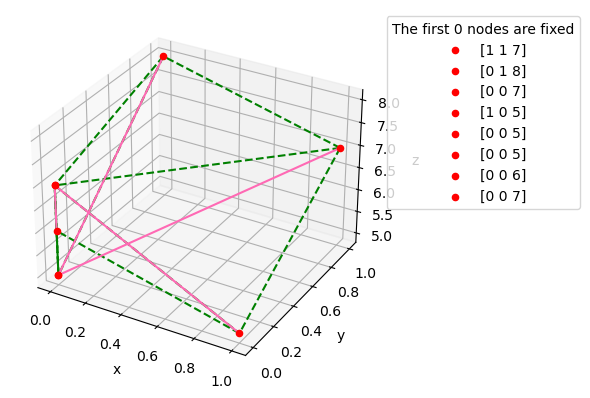

[-0.00153551  0.02445381  0.0696183  -0.02928932  0.00766655  0.04371031
 -0.05527864 -0.02928932  0.04126796  0.02055728 -0.05527864 -0.10167184
  0.03082483  0.03082483  0.01164966  0.          0.02162278  0.11486833
  0.          0.          0.14        0.03472136  0.          0.08055728]
[-0.00153551  0.02445381  0.0696183  -0.02928932  0.00766655  0.04371031
 -0.05527864 -0.02928932  0.04126796  0.02055728 -0.05527864 -0.10167184
  0.03082483  0.03082483  0.01164966  0.          0.02162278  0.11486833
  0.          0.          0.14        0.03472136  0.          0.08055728]
[-0.00153551  0.02445381  0.0696183  -0.02928932  0.00766655  0.04371031
 -0.05527864 -0.02928932  0.04126796  0.02055728 -0.05527864 -0.10167184
  0.03082483  0.03082483  0.01164966  0.          0.02162278  0.11486833
  0.          0.          0.14        0.03472136  0.          0.08055728]
[-0.00153551  0.02445381  0.0696183  -0.02928932  0.00766655  0.04371031
 -0.05527864 -0.02928932  0.04126796  0.02055728

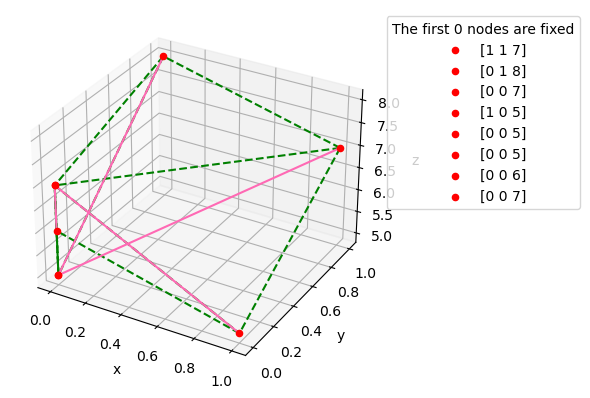

ValueError: cannot convert float NaN to integer

In [6]:
import FreeStandingStruct2 as FSS
importlib.reload(FSS)
import optimization2 as opt
importlib.reload(opt)
importlib.reload(plotting)
s = 0.70970
t = 9.54287

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1, -s-0.1, t-0.1],
                  [ s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1,  s-0.1, t-0.1]])

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, -5],
                  [-1, -1, 0],
                  [ 1, -1, -3],
                  [ 1,  1, 5],
                  [-1,  1, 6],
                  [-1, -1, 7],
                  [ 1, -1, 8]])
num_of_nodes = 8
num_of_fixed_nodes = 4
cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1],
                   [0, 1, 1],
                   [0, 3, 1],
                   [1, 2, 1],
                   [2, 3, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([[0,0],[1,0],[2,0],[3,0],[4, 0],
                   [5, 0],
                   [6, 0],
                   [7, 0]])

c=1
k=0.1
bar_density = 0.01

new_struct2 = FSS.FreeStandingStruct(num_of_nodes, nodes, masses, cables, bars, k, c, bar_density, 100)
plotting.plot(new_struct2)
plt.show()
print(new_struct2.penalty)
print(new_struct2.gradient())
tolerances=np.array([1e-3, 1e-5, 1e-7, 1e-9, 1e-11])
new_struct2_opt = opt.quadratic_penalty_method(new_struct2, 10, tolerances, maxiter_BFGS=500)

plotting.plot(new_struct2_opt)
plt.show()